# Setup

# Logger terms:

- agent_dones
- total_avg_agent_r
- total_agent_collisions
- total_obstacle_collisions
- total_steps



In [1]:
from plotting_utils import *
import matplotlib.pyplot as plt
from cycler import cycler
plt.style.use('ggplot')

# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = 'Ubuntu'
# plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 8
#plt.rcParams['figure.titlesize'] = 15
#plt.rcParams['figure.titleweight'] = 'bold'

#plt.rc('lines', linewidth=4)
#plt.rc('axes', prop_cycle=(cycler(color=['r', 'g', 'b', 'y']) +
#                           cycler(linestyle=['-', '--', ':', '-.'])))
plt.rc('axes', prop_cycle=(cycler(color=['red', 'green', 'blue', 'yellow','cyan', 'magenta',\
                                         'black', 'orange', 'maroon', 'lime', 'aqua', \
                                         'indigo', 'darkviolet', 'dimgray', 'deeppink'])))

# Experiments

# 1A  Discount factor

## Description

Purpose: Which discount factor works best between algorithms? How does the optimal discount factor change with increasing environment sizes, obstacle densities and number of agents?

Env1: Size:5x5 Obs density: 0.2  N_agents = 2

Env2: Size: 7x7 Obs density: 0.2  n_agents 2

Env3:  size 5x5 Obse density: 0.0  n_agents = 2

Env4: size 5x5  Obs density 0.0 N-agents = 6

Other parameters: 

Lambda = 1.0

Entropy = 0.001

Optimizer = Adam

lr = 0.001

K = 8

Minibarches = 512

n_workers = 4 ; rollout length = 256 therefore Batch_size = 1024


# Seeds

In [ ]:
source = '/home/james/Desktop/Gridworld/test/test2'
all_data = get_event_data(source)

In [ ]:
save_as = "plots/1/pposeeds.png"
####################################################

filter_terms = ["envsize_7"]
field = "agent_dones"
plot_term = "disc"
params = {"title": "7x7 Gridworld    Obstacle Density 0.2 ",
         "xlabel": "Iterations",
         "ylabel": "Average Agent Reward",
         "aliasplotterm": "$\gamma$",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10}

fig, ax = plt.subplots(figsize=(6,4))

data = filter(all_data, filter_terms)
plot(ax, data, field, plot_term, params, smooth=40)

#ax.set_xlabel('x label')  # Add an x-label to the axes.
#ax.set_ylabel('y label')  # Add a y-label to the axes.
#ax.set_title("Simple Plot")  # Add a title to the axes.
#ax.legend()  # Add a legend.
plt.show()
fig.savefig(make_exist(save_as))

# 1A1 PPO discount vs Env size

In [55]:
source = '/home/james/Desktop/Gridworld/CENTRAL_TENSORBOARD/1A'
all_data = get_event_data(source)

In [2]:
def plot2(ax, data, field, plot_term, params, smooth = None):
    '''data is already in filtered form
    data: {name:list of data_points} '''
    def last(a):
        return a[-1]

    colours = ['red', 'green', 'blue', 'yellow','cyan', 'magenta',\
                'black', 'orange', 'maroon', 'lime', 'aqua', \
                'indigo', 'darkviolet', 'dimgray', 'deeppink']

    all_plots = []
   # all_points = {}
    lookup = set()
    exclude_last_points = 1
    this_cmap = {}
    c_cpy = colours[:]
    c_taken = params["cmap"].values()
    for c in c_taken:
        if c in c_cpy:
            c_cpy.remove(c)
    for i,(k, v) in enumerate(data.items()):
        if plot_term in k:
            exp_id = k.split("_")
            ind = exp_id.index(plot_term)
            plot_term_value = exp_id[ind+1]
            if not plot_term_value in lookup:
                lookup.add(plot_term_value)
                label = params["aliasplotterm"] + ' = ' + plot_term_value
                if not smooth is None:
                    new_data = moving_average_filter(v[field], smooth)
                    exclude_last_points = smooth + 1
                else:
                    new_data = v[field][:]
                x = np.arange(len(new_data))
                
                if label in params["cmap"]:
                    c_hldr = params["cmap"][label]
                else:
                    c_hldr = c_cpy[0]
                    del c_cpy[0]
                this_cmap[label] = c_hldr
                #all_points[label] = (x, new_data, float(plot_term_value))
                handle = ax.plot(x[7:-exclude_last_points], new_data[7:-exclude_last_points], label = label, color = c_hldr)[0]
                all_plots.append((handle,label, float(plot_term_value)))


  #  all_points = {k: v for k, v in sorted(all_points.items(), key=lambda item: item[1][2], reverse = True)}

    handles, labels = ax.get_legend_handles_labels()
    label_id = [float(l.split(" = ")[-1]) for l in labels]
    all_plots = [tuple(i) for i in zip(handles, labels, label_id)]
   # all_plots.sort(key = last, reverse=True)


   # print(handles, labels)

    ax.set_xlabel(params["xlabel"], fontsize = params["xlabelsize"])  # Add an x-label to the axes.
    ax.set_ylabel(params["ylabel"], fontsize = params["ylabelsize"])  # Add a y-label to the axes.
    ax.set_title(params["title"], fontsize = params["titlesize"])  # Add a title to the axes.

  #  handles = [p[0] for p in all_plots]
   # lbls = [p[1] for p in all_plots]
    h,l,_ = zip(*all_plots)
    return h, l, this_cmap
    #ax.legend(h, l)  # Add a legend.

/home/james/anaconda3/envs/gridworld/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


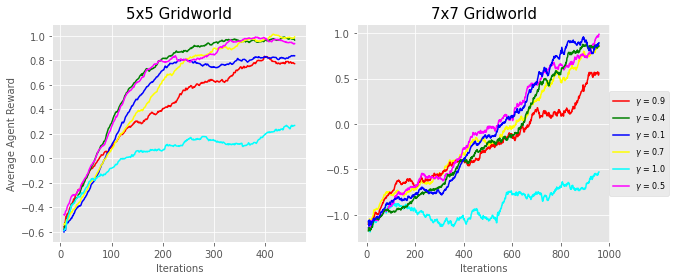

In [38]:
field = "total_avg_agent_r"#"agent_dones"
plot_term = "disc"

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))

filter_terms1 = ["envsize_5","objdensity_0.2"]
params1 = {"title": "5x5 Gridworld",
         "xlabel": "Iterations",
         "ylabel": "Average Agent Reward",
         "aliasplotterm": "$\gamma$",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap":{}}

data1 = filter(all_data, filter_terms1)
h1,l1,cmap = plot2(ax1, data1, field, plot_term, params1, smooth=40)


filter_terms2 = ["envsize_7","objdensity_0.2"]
params2 = {"title": "7x7 Gridworld",
         "xlabel": "Iterations",
         "ylabel": "",
         "aliasplotterm": "$\gamma$",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap": cmap}


data2 = filter(all_data, filter_terms2)
h,l,cmap = plot2(ax2, data2, field, plot_term, params2, smooth=40)

fig.legend(h1,     # The line objects
           labels=l1,   # The labels for each line
           loc= (0.90,0.3)#"center right"   # Position of legend
          # borderaxespad=0.1,    # Small spacing around legend box
         #  title="Legend Title"  # Title for the legend
           )
#ax.set_xlabel('x label')  # Add an x-label to the axes.
#ax.set_ylabel('y label')  # Add a y-label to the axes.
#ax.set_title("Simple Plot")  # Add a title to the axes.
#ax.legend()  # Add a legend.

#plt.subplots_adjust(right=0.85)

plt.show()


In [39]:
save_as = "plots/1/ppo_1A1.png" 
fig.savefig(make_exist(save_as))

In [5]:
# @hidden_cell

# field = "total_avg_agent_r"#"agent_dones"
# plot_term = "disc"

# fig, (ax1,ax2) = plt.subplots(1,2) #, figsize=(6,4))

# filter_terms1 = ["envsize_5","objdensity_0.2"]
# params1 = {"title": "5x5 Gridworld",
#          "xlabel": "Iterations",
#          "ylabel": "Average Agent Reward",
#          "aliasplotterm": "$\gamma$",
#          "titlesize":15,
#          "xlabelsize":10,
#          "ylabelsize":10,
#           "cmap":{}}

# data1 = filter(all_data, filter_terms1)
# plot(ax1, data1, field, plot_term, params1, smooth=40)

# filter_terms2 = ["envsize_7","objdensity_0.2"]
# params2 = {"title": "7x7 Gridworld",
#          "xlabel": "Iterations",
#          "ylabel": "",
#          "aliasplotterm": "$\gamma$",
#          "titlesize":15,
#          "xlabelsize":10,
#          "ylabelsize":10,
#           "cmap": cmap}


# data2 = filter(all_data, filter_terms2)
# plot(ax2, data2, field, plot_term, params2, smooth=40)

# # fig.legend(h1,     # The line objects
# #            labels=l1,   # The labels for each line
# #            loc="center right"   # Position of legend
# #           # borderaxespad=0.1,    # Small spacing around legend box
# #          #  title="Legend Title"  # Title for the legend
# #            )
# #ax.set_xlabel('x label')  # Add an x-label to the axes.
# #ax.set_ylabel('y label')  # Add a y-label to the axes.
# #ax.set_title("Simple Plot")  # Add a title to the axes.
# #ax.legend()  # Add a legend.
# plt.show()


# 1A2 disount vs number of obstacles

/home/james/anaconda3/envs/gridworld/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


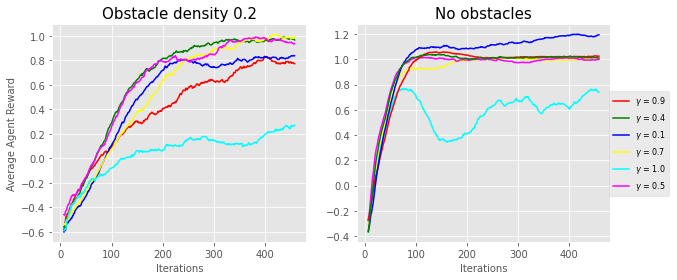

In [40]:
field = "total_avg_agent_r"#"agent_dones"
plot_term = "disc"

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))

filter_terms1 = ["envsize_5", "nagents_2","objdensity_0.2"]
params1 = {"title": "Obstacle density 0.2",
         "xlabel": "Iterations",
         "ylabel": "Average Agent Reward",
         "aliasplotterm": "$\gamma$",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap":{}}

data1 = filter(all_data, filter_terms1)
h1,l1,cmap = plot2(ax1, data1, field, plot_term, params1, smooth=40)


filter_terms2 = ["envsize_5", "nagents_2","objdensity_0.0"]#["envsize_7","objdensity_0.2"]
params2 = {"title": "No obstacles",
         "xlabel": "Iterations",
         "ylabel": "",
         "aliasplotterm": "$\gamma$",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap": cmap}


data2 = filter(all_data, filter_terms2)
h,l,cmap = plot2(ax2, data2, field, plot_term, params2, smooth=40)

fig.legend(h1,     # The line objects
           labels=l1,   # The labels for each line
           loc= (0.90,0.3)#"center right"   # Position of legend
          # borderaxespad=0.1,    # Small spacing around legend box
         #  title="Legend Title"  # Title for the legend
           )
#ax.set_xlabel('x label')  # Add an x-label to the axes.
#ax.set_ylabel('y label')  # Add a y-label to the axes.
#ax.set_title("Simple Plot")  # Add a title to the axes.
#ax.legend()  # Add a legend.

#plt.subplots_adjust(right=0.85)

plt.show()

In [41]:
save_as = "plots/1/ppo_1A2.png" 
fig.savefig(make_exist(save_as))

In [54]:
print([k for k in all_data.keys() if "nagents_1" in k])

[]


# 1A3 Number of agents

/home/james/anaconda3/envs/gridworld/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


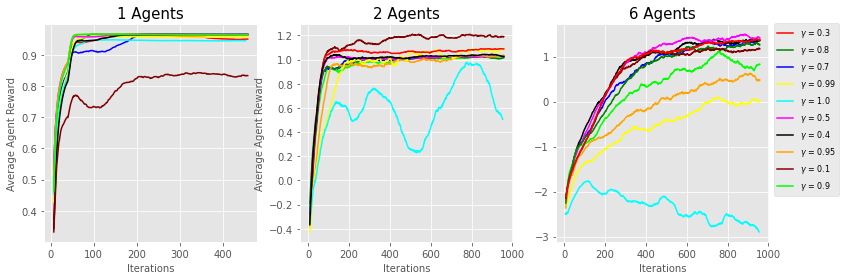

In [56]:
field = "total_avg_agent_r"#"agent_dones"
plot_term = "disc"

fig, (ax0, ax1,ax2) = plt.subplots(1,3, figsize=(13,4))


filter_terms0 = ["envsize_5", "nagents_1","objdensity_0.0"]
params0 = {"title": "1 Agents",
         "xlabel": "Iterations",
         "ylabel": "Average Agent Reward",
         "aliasplotterm": "$\gamma$",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap":{}}

data0 = filter(all_data, filter_terms0)
h0,l0,cmap = plot2(ax0, data0, field, plot_term, params0, smooth=40)


filter_terms1 = ["envsize_5", "nagents_2","objdensity_0.0"]
params1 = {"title": "2 Agents",
         "xlabel": "Iterations",
         "ylabel": "Average Agent Reward",
         "aliasplotterm": "$\gamma$",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap":cmap}

data1 = filter(all_data, filter_terms1)
h1,l1,cmap = plot2(ax1, data1, field, plot_term, params1, smooth=40)


filter_terms2 = ["envsize_5", "nagents_6","objdensity_0.0"]#["envsize_7","objdensity_0.2"]
params2 = {"title": "6 Agents",
         "xlabel": "Iterations",
         "ylabel": "",
         "aliasplotterm": "$\gamma$",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap": cmap}


data2 = filter(all_data, filter_terms2)
h,l,cmap = plot2(ax2, data2, field, plot_term, params2, smooth=40)

fig.legend(h0,     # The line objects
           labels=l0,   # The labels for each line
           loc= (0.91,0.3)#"center right"   # Position of legend
          # borderaxespad=0.1,    # Small spacing around legend box
         #  title="Legend Title"  # Title for the legend
           )
#ax.set_xlabel('x label')  # Add an x-label to the axes.
#ax.set_ylabel('y label')  # Add a y-label to the axes.
#ax.set_title("Simple Plot")  # Add a title to the axes.
#ax.legend()  # Add a legend.

plt.subplots_adjust(right=0.9)

plt.show()

In [57]:
save_as = "plots/1/ppo_1A3.png" 
fig.savefig(make_exist(save_as))

## Agents Collisions

/home/james/anaconda3/envs/gridworld/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


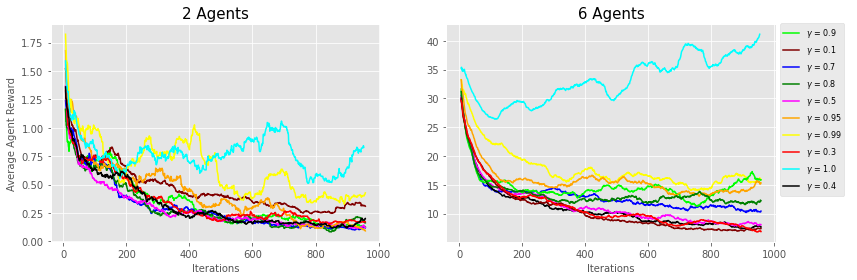

In [48]:
field = "total_agent_collisions"#"total_avg_agent_r"#"agent_dones"
plot_term = "disc"

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(13,4))


# filter_terms0 = ["envsize_5", "nagents_1","objdensity_0.0"]
# params0 = {"title": "1 Agents",
#          "xlabel": "Iterations",
#          "ylabel": "Average Agent Reward",
#          "aliasplotterm": "$\gamma$",
#          "titlesize":15,
#          "xlabelsize":10,
#          "ylabelsize":10,
#           "cmap":{}}

# data0 = filter(all_data, filter_terms0)
# h0,l0,cmap = plot2(ax0, data0, field, plot_term, params0, smooth=40)


filter_terms1 = ["envsize_5", "nagents_2","objdensity_0.0"]
params1 = {"title": "2 Agents",
         "xlabel": "Iterations",
         "ylabel": "Average Agent Reward",
         "aliasplotterm": "$\gamma$",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap":cmap}

data1 = filter(all_data, filter_terms1)
h1,l1,cmap = plot2(ax1, data1, field, plot_term, params1, smooth=40)


filter_terms2 = ["envsize_5", "nagents_6","objdensity_0.0"]#["envsize_7","objdensity_0.2"]
params2 = {"title": "6 Agents",
         "xlabel": "Iterations",
         "ylabel": "",
         "aliasplotterm": "$\gamma$",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap": cmap}


data2 = filter(all_data, filter_terms2)
h,l,cmap = plot2(ax2, data2, field, plot_term, params2, smooth=40)

fig.legend(h1,     # The line objects
           labels=l1,   # The labels for each line
           loc= (0.91,0.3)#"center right"   # Position of legend
          # borderaxespad=0.1,    # Small spacing around legend box
         #  title="Legend Title"  # Title for the legend
           )
#ax.set_xlabel('x label')  # Add an x-label to the axes.
#ax.set_ylabel('y label')  # Add a y-label to the axes.
#ax.set_title("Simple Plot")  # Add a title to the axes.
#ax.legend()  # Add a legend.

plt.subplots_adjust(right=0.9)

plt.show()

Comparing 2 and 6 agent plots, lower dicount gives less collisions and higher reward.

Data for one agent has aslo been genereated and can be plotted along with these.

# 1B Lambda

# Across env size

In [35]:
source = '/home/james/Desktop/Gridworld/CENTRAL_TENSORBOARD/1B'
all_data = get_event_data(source)

/home/james/anaconda3/envs/gridworld/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


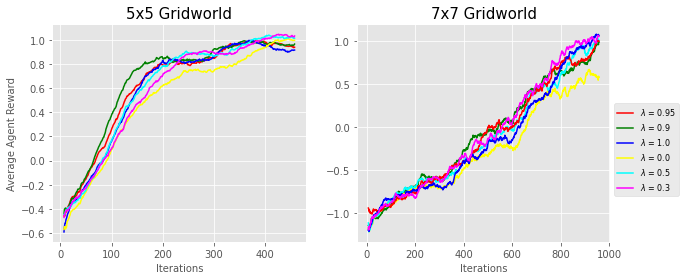

In [36]:
field = "total_avg_agent_r"#"agent_dones"
plot_term = "lambda"

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))

filter_terms1 = ["disc_0.5", "envsize_5","objdensity_0.2"]
params1 = {"title": "5x5 Gridworld",
         "xlabel": "Iterations",
         "ylabel": "Average Agent Reward",
         "aliasplotterm": "$\lambda$",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap":{}}

data1 = filter(all_data, filter_terms1)
h1,l1,cmap = plot2(ax1, data1, field, plot_term, params1, smooth=40)


filter_terms2 = ["disc_0.5","envsize_7","objdensity_0.2"]
params2 = {"title": "7x7 Gridworld",
         "xlabel": "Iterations",
         "ylabel": "",
         "aliasplotterm": "$\lambda$",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap": cmap}


data2 = filter(all_data, filter_terms2)
h,l,cmap = plot2(ax2, data2, field, plot_term, params2, smooth=40)

fig.legend(h1,     # The line objects
           labels=l1,   # The labels for each line
           loc= (0.90,0.3)#"center right"   # Position of legend
          # borderaxespad=0.1,    # Small spacing around legend box
         #  title="Legend Title"  # Title for the legend
           )
#ax.set_xlabel('x label')  # Add an x-label to the axes.
#ax.set_ylabel('y label')  # Add a y-label to the axes.
#ax.set_title("Simple Plot")  # Add a title to the axes.
#ax.legend()  # Add a legend.

#plt.subplots_adjust(right=0.85)

plt.show()


# Across obstacle densities:

On environment where obsacle density is 0, lambda makes less of a difference. Main factor in performance not lambda, but disount rate

/home/james/anaconda3/envs/gridworld/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


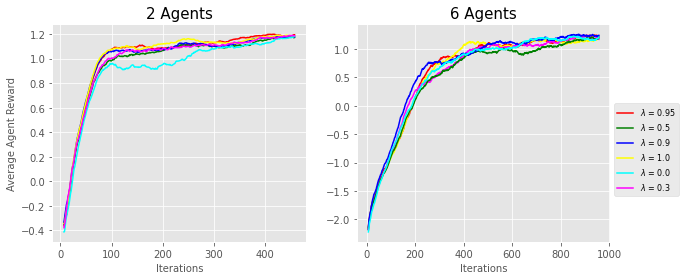

In [18]:
field = "total_avg_agent_r"#"agent_dones"
plot_term = "lambda"

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))

filter_terms1 = ["disc_0.1", "envsize_5","objdensity_0.0", "nagents_2"]
params1 = {"title": "2 Agents",
         "xlabel": "Iterations",
         "ylabel": "Average Agent Reward",
         "aliasplotterm": "$\lambda$",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap":{}}

data1 = filter(all_data, filter_terms1)
h1,l1,cmap = plot2(ax1, data1, field, plot_term, params1, smooth=40)


filter_terms2 = ["disc_0.1", "envsize_5","objdensity_0.0", "nagents_6"]
params2 = {"title": "6 Agents",
         "xlabel": "Iterations",
         "ylabel": "",
         "aliasplotterm": "$\lambda$",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap": cmap}


data2 = filter(all_data, filter_terms2)
h,l,cmap = plot2(ax2, data2, field, plot_term, params2, smooth=40)

fig.legend(h1,     # The line objects
           labels=l1,   # The labels for each line
           loc= (0.90,0.3)#"center right"   # Position of legend
          # borderaxespad=0.1,    # Small spacing around legend box
         #  title="Legend Title"  # Title for the legend
           )
#ax.set_xlabel('x label')  # Add an x-label to the axes.
#ax.set_ylabel('y label')  # Add a y-label to the axes.
#ax.set_title("Simple Plot")  # Add a title to the axes.
#ax.legend()  # Add a legend.

#plt.subplots_adjust(right=0.85)

plt.show()


Increasing number of agents does not have large effect on performace across lambda values

# Lambda value for different disount rates:
The lambda value has less of an effect on learning than the disount factor. At a low discount values lambda values across the range from 0 to 1 perform very similar.

Seems differences in performacene across hyperparameters are greatest in more difficuilt environmnents.

# C: Entropy
Only tested in larger 7x7 Env with obstacle density of 0.2 and increasing number of agents

Lambda is kept at 1.0 and discount at 0.5 (All other parameters are as default)

In [48]:
source = '/home/james/Desktop/Gridworld/CENTRAL_TENSORBOARD/ppo_1C'
all_data = get_event_data(source)

/home/james/anaconda3/envs/gridworld/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


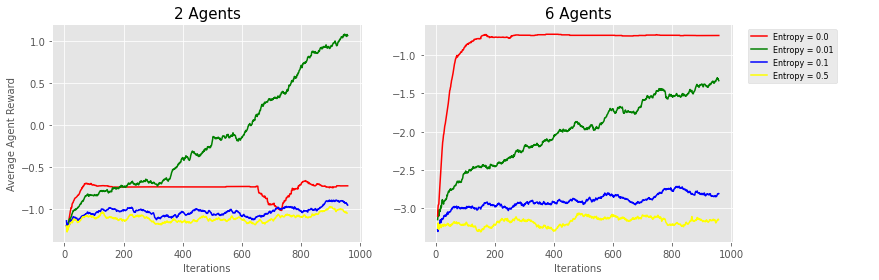

In [49]:
field = "total_avg_agent_r"#"agent_dones"
plot_term = "entropy"

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,4))

filter_terms1 = ["nagents_2"]
params1 = {"title": "2 Agents",
         "xlabel": "Iterations",
         "ylabel": "Average Agent Reward",
         "aliasplotterm": "Entropy",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap":{}}

data1 = filter(all_data, filter_terms1)
h1,l1,cmap = plot2(ax1, data1, field, plot_term, params1, smooth=40)


filter_terms2 = ["nagents_6"]
params2 = {"title": "6 Agents",
         "xlabel": "Iterations",
         "ylabel": "",
         "aliasplotterm": "Entropy",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap": cmap}


data2 = filter(all_data, filter_terms2)
h,l,cmap = plot2(ax2, data2, field, plot_term, params2, smooth=40)

fig.legend(h1,     # The line objects
           labels=l1,   # The labels for each line
           loc= (0.85,0.7)#"center right"   # Position of legend
          # borderaxespad=0.1,    # Small spacing around legend box
         #  title="Legend Title"  # Title for the legend
           )
#ax.set_xlabel('x label')  # Add an x-label to the axes.
#ax.set_ylabel('y label')  # Add a y-label to the axes.
#ax.set_title("Simple Plot")  # Add a title to the axes.
#ax.legend()  # Add a legend.

plt.subplots_adjust(right=0.8)

plt.show()


As per the entropy coefficient used most often in papers, an entropy coeficient of 0.01 gives the best results. Whilst in the 6 agent case the policy quickly converges to a local optima, the policy with entropy coefficient 0.01 surpasses that of 0.0 with more training (as can be seen initially in the case with two agnets). Entropy regularization is crucial when there are more agents since penalties for collisions will result in a subotimal policy of standing still when there is no entropy. 

In [50]:
save_as = "plots/1/ppo_1C1.png" 
fig.savefig(make_exist(save_as))

# D1: PPO Learning rate (obstacle density = 0.2):
Adam optimzer used. Since Adam uses adaptive learning rate, the learning rate should only have an influence on initial learning...Whilst SGD may give better results in certain cases (cite), the advantages of Adam of being less sensitive to the learning rate outweigh the 

In [51]:
source = '/home/james/Desktop/Gridworld/CENTRAL_TENSORBOARD/ppo_1D'
all_data = get_event_data(source)

/home/james/anaconda3/envs/gridworld/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


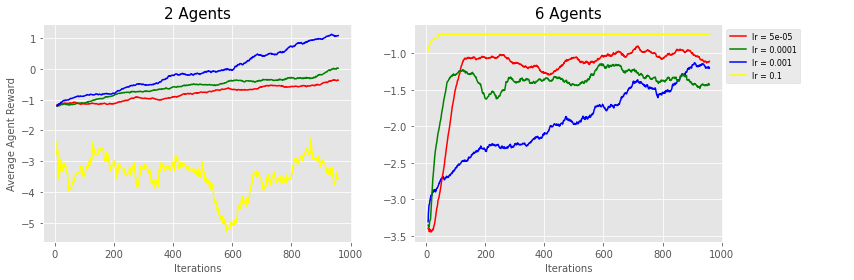

In [52]:
field = "total_avg_agent_r"#"agent_dones"
plot_term = "lr"

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,4))

filter_terms1 = ["nagents_2"]
params1 = {"title": "2 Agents",
         "xlabel": "Iterations",
         "ylabel": "Average Agent Reward",
         "aliasplotterm": "lr",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap":{}}

data1 = filter(all_data, filter_terms1)
h1,l1,cmap = plot2(ax1, data1, field, plot_term, params1, smooth=40)


filter_terms2 = ["nagents_6"]
params2 = {"title": "6 Agents",
         "xlabel": "Iterations",
         "ylabel": "",
         "aliasplotterm": "lr",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap": cmap}


data2 = filter(all_data, filter_terms2)
h,l,cmap = plot2(ax2, data2, field, plot_term, params2, smooth=40)

fig.legend(h1,     # The line objects
           labels=l1,   # The labels for each line
           loc= (0.85,0.7)#"center right"   # Position of legend
          # borderaxespad=0.1,    # Small spacing around legend box
         #  title="Legend Title"  # Title for the legend
           )
#ax.set_xlabel('x label')  # Add an x-label to the axes.
#ax.set_ylabel('y label')  # Add a y-label to the axes.
#ax.set_title("Simple Plot")  # Add a title to the axes.
#ax.legend()  # Add a legend.

plt.subplots_adjust(right=0.8)

plt.show()

In [53]:
save_as = "plots/1/ppo_1D1.png" 
fig.savefig(make_exist(save_as))

# D1: PPO Learning rate (obstacle density = 0.0):

# ___________________________________________

_______________________________________________________________________________________________

In [ ]:


# field = "total_avg_agent_r"#"agent_dones"
# plot_term = "lr"

# fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,4))

# filter_terms1 = ["nagents_2"]
# params1 = {"title": "2 Agents",
#          "xlabel": "Iterations",
#          "ylabel": "Average Agent Reward",
#          "aliasplotterm": "lr",
#          "titlesize":15,
#          "xlabelsize":10,
#          "ylabelsize":10,
#           "cmap":{}}

# data1 = filter(all_data, filter_terms1)
# h1,l1,cmap = plot2(ax1, data1, field, plot_term, params1, smooth=40)


# filter_terms2 = ["nagents_6"]
# params2 = {"title": "6 Agents",
#          "xlabel": "Iterations",
#          "ylabel": "",
#          "aliasplotterm": "lr",
#          "titlesize":15,
#          "xlabelsize":10,
#          "ylabelsize":10,
#           "cmap": cmap}


# data2 = filter(all_data, filter_terms2)
# h,l,cmap = plot2(ax2, data2, field, plot_term, params2, smooth=40)

# fig.legend(h1,     # The line objects
#            labels=l1,   # The labels for each line
#            loc= (0.85,0.7)#"center right"   # Position of legend
#           # borderaxespad=0.1,    # Small spacing around legend box
#          #  title="Legend Title"  # Title for the legend
#            )
# #ax.set_xlabel('x label')  # Add an x-label to the axes.
# #ax.set_ylabel('y label')  # Add a y-label to the axes.
# #ax.set_title("Simple Plot")  # Add a title to the axes.
# #ax.legend()  # Add a legend.

# plt.subplots_adjust(right=0.8)

# plt.show()

# PPO Batch sizes?

# ________________________________________________________________
# MAAC Experiments

# 1A1 Discount rate in 7x7 Obstacle density=0.2

"seed": [1],
"discount":[0.1,0.5,0.9,0.95],
"rollout_threads": [1],
"reward_scale": [100],
"policy": ["MAAC"],
"base_policy_type": ["mlp"],
"n_agents": [6],
"obj_density": [0.2],
"env_size": [7],
"maac_steps_per_update":[100],
"maac_num_updates":[4],
"maac_attend_heads":[4],
"maac_batch_size": [1024]

In [11]:
source = '/home/james/Desktop/Gridworld/CENTRAL_TENSORBOARD/Maac_1A'
all_data = get_event_data(source)

/home/james/anaconda3/envs/gridworld/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


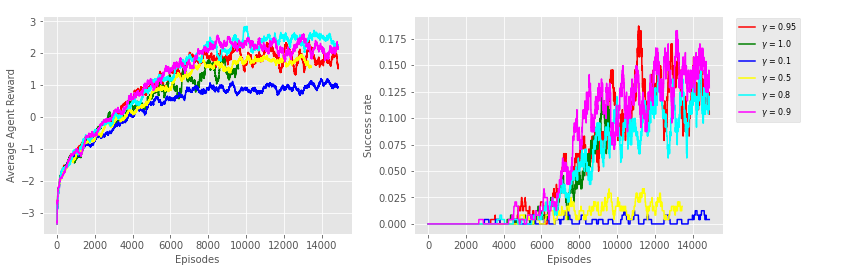

In [12]:
field = "total_avg_agent_r"#"agent_dones"
plot_term = "disc"

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))

filter_terms1 = []
params1 = {"title": "",
         "xlabel": "Episodes",
         "ylabel": "Average Agent Reward",
         "aliasplotterm": "$\gamma$",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap":{}}

data1 = filter(all_data, filter_terms1)
h1,l1,cmap = plot2(ax1, data1, field, plot_term, params1, smooth=120)


filter_terms2 = []
params2 = {"title": "",
         "xlabel": "Episodes",
         "ylabel": "Success rate",
         "aliasplotterm": "$\gamma$",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap": cmap}

field = "agent_dones"
data2 = filter(all_data, filter_terms2)
h,l,cmap = plot2(ax2, data2, field, plot_term, params2, smooth=120)

fig.legend(h1,     # The line objects
           labels=l1,   # The labels for each line
           loc= (0.86,0.55)#"center right"   # Position of legend
          # borderaxespad=0.1,    # Small spacing around legend box
         #  title="Legend Title"  # Title for the legend
           )
#ax.set_xlabel('x label')  # Add an x-label to the axes.
#ax.set_ylabel('y label')  # Add a y-label to the axes.
#ax.set_title("Simple Plot")  # Add a title to the axes.
#ax.legend()  # Add a legend.

plt.subplots_adjust(right=0.8)

plt.show()

In [13]:
save_as = "plots/1/maac_1A1.png" 
fig.savefig(make_exist(save_as))

disount of 0.9 performs best

# 1B1 Different reward scales (or entropy since SAC is used)

"seed": [1],
"discount":[0.5],
"rollout_threads": [1],
"reward_scale": [10,50,100],
"policy": ["MAAC"],
"base_policy_type": ["mlp"],
"n_agents": [6],
"obj_density": [0.2],
"env_size": [7],
"maac_steps_per_update":[100],
"maac_num_updates":[4],
"maac_attend_heads":[4],
"maac_batch_size": [1024]


In [15]:
source = '/home/james/Desktop/Gridworld/CENTRAL_TENSORBOARD/Maac_1B'
all_data = get_event_data(source)

/home/james/anaconda3/envs/gridworld/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


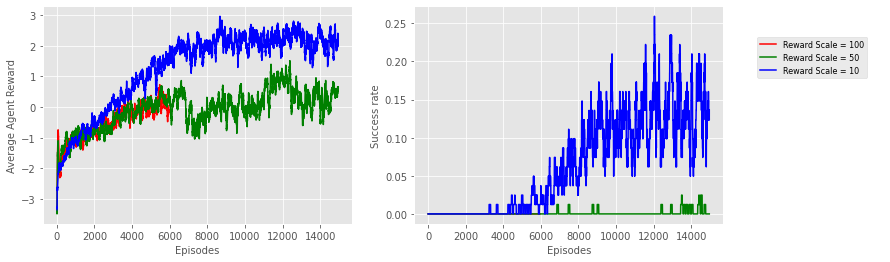

In [16]:
field = "total_avg_agent_r"#"agent_dones"
plot_term = "rewardscale"

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))

filter_terms1 = []
params1 = {"title": "",
         "xlabel": "Episodes",
         "ylabel": "Average Agent Reward",
         "aliasplotterm": "Reward Scale",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap":{}}

data1 = filter(all_data, filter_terms1)
h1,l1,cmap = plot2(ax1, data1, field, plot_term, params1, smooth=40)


filter_terms2 = []
params2 = {"title": "",
         "xlabel": "Episodes",
         "ylabel": "Success rate",
         "aliasplotterm": "Reward Scale",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap": cmap}

field = "agent_dones"
data2 = filter(all_data, filter_terms2)
h,l,cmap = plot2(ax2, data2, field, plot_term, params2, smooth=40)

fig.legend(h1,     # The line objects
           labels=l1,   # The labels for each line
           loc= (0.85,0.7)#"center right"   # Position of legend
          # borderaxespad=0.1,    # Small spacing around legend box
         #  title="Legend Title"  # Title for the legend
           )
#ax.set_xlabel('x label')  # Add an x-label to the axes.
#ax.set_ylabel('y label')  # Add a y-label to the axes.
#ax.set_title("Simple Plot")  # Add a title to the axes.
#ax.legend()  # Add a legend.

plt.subplots_adjust(right=0.8)

plt.show()

Lower reward scale beter suited for env  TODO: can also see with reward scale 20 and 5

In [17]:
save_as = "plots/1/maac_1B1.png" 
fig.savefig(make_exist(save_as))

# 1C1 Different batch sizes:

"seed": [1],
"discount":[0.5],
"rollout_threads": [1],
"reward_scale": [100],
"policy": ["MAAC"],
"base_policy_type": ["mlp"],
"n_agents": [6],
"obj_density": [0.2],
"env_size": [7],
"maac_steps_per_update":[100],
"maac_num_updates":[4],
"maac_attend_heads":[4],
"maac_batch_size": [512,1024,2048]

In [6]:
source = '/home/james/Desktop/Gridworld/CENTRAL_TENSORBOARD/Maac_1C'
all_data = get_event_data(source)

/home/james/anaconda3/envs/gridworld/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


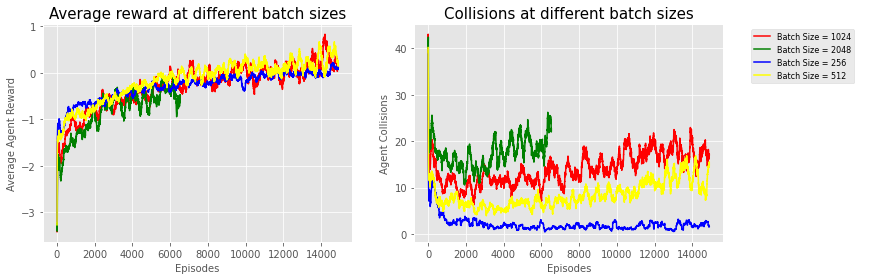

In [7]:
field = "total_avg_agent_r"#"agent_dones"
plot_term = "minibatch"

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))

filter_terms1 = []
params1 = {"title": "Average reward at different batch sizes",
         "xlabel": "Episodes",
         "ylabel": "Average Agent Reward",
         "aliasplotterm": "Batch Size",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap":{}}

data1 = filter(all_data, filter_terms1)
h1,l1,cmap = plot2(ax1, data1, field, plot_term, params1, smooth=100)


filter_terms2 = []
params2 = {"title": "Collisions at different batch sizes",
         "xlabel": "Episodes",
         "ylabel": "Agent Collisions",
         "aliasplotterm": "Batch Size",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap": cmap}

field = "total_agent_collisions"
data2 = filter(all_data, filter_terms2)
h,l,cmap = plot2(ax2, data2, field, plot_term, params2, smooth=100)

fig.legend(h1,     # The line objects
           labels=l1,   # The labels for each line
           loc= (0.85,0.7)#"center right"   # Position of legend
          # borderaxespad=0.1,    # Small spacing around legend box
         #  title="Legend Title"  # Title for the legend
           )
#ax.set_xlabel('x label')  # Add an x-label to the axes.
#ax.set_ylabel('y label')  # Add a y-label to the axes.
#ax.set_title("Simple Plot")  # Add a title to the axes.
#ax.legend()  # Add a legend.

plt.subplots_adjust(right=0.8)

plt.show()

In [8]:
save_as = "plots/1/maac_1C1.png" 
fig.savefig(make_exist(save_as))

Batch size seems not to play that large of a role. However the trend seems to be that smaller batch sizes do slightly better.  TODO: Test smaller batch sizes of 256: Also does this trend hold on smaller env with no obstacles?

# 1D1 Number of attention heads with different number of agents:
        
"seed": [1],
"discount":[0.5],
"rollout_threads": [1],
"reward_scale": [10],
"policy": ["MAAC"],
"base_policy_type": ["mlp"],
"n_agents": [6,12],
"obj_density": [0.2],
"env_size": [7],
"maac_steps_per_update":[100],
"maac_num_updates":[4],
"maac_attend_heads":[4,8,12],
"maac_batch_size": [1024]

In [9]:
source = '/home/james/Desktop/Gridworld/CENTRAL_TENSORBOARD/Maac_1D'
all_data = get_event_data(source)

In [10]:
# a = list(all_data.values())
# print(a[0].keys())
#print(all_data.keys())
del all_data['MAAC_disc_0.5_rewardscale_10_minibatch_1024_nupdates_100_attheads_12_envsize_7_nagents_6_objdensity_0.2_seed_1']

/home/james/anaconda3/envs/gridworld/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


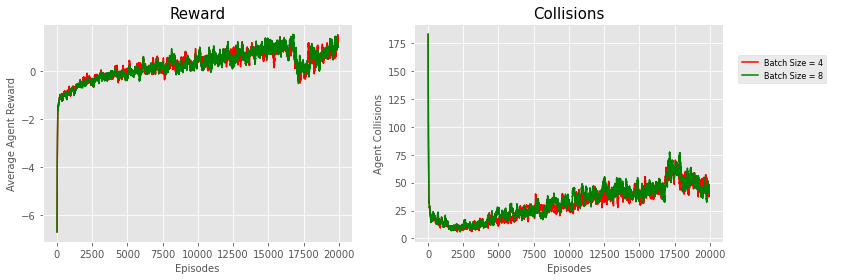

In [36]:
field = "total_avg_agent_r"#"agent_dones"
plot_term = "attheads"

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))

filter_terms1 = []
params1 = {"title": "Reward",
         "xlabel": "Episodes",
         "ylabel": "Average Agent Reward",
         "aliasplotterm": "Attention Heads",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap":{}}

data1 = filter(all_data, filter_terms1)
h1,l1,cmap = plot2(ax1, data1, field, plot_term, params1, smooth=40)


filter_terms2 = []
params2 = {"title": "Collisions",
         "xlabel": "Episodes",
         "ylabel": "Agent Collisions",
         "aliasplotterm": "Attention Heads",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap": cmap}

field = "total_agent_collisions"
data2 = filter(all_data, filter_terms2)
h,l,cmap = plot2(ax2, data2, field, plot_term, params2, smooth=40)

fig.legend(h1,     # The line objects
           labels=l1,   # The labels for each line
           loc= (0.85,0.7)#"center right"   # Position of legend
          # borderaxespad=0.1,    # Small spacing around legend box
         #  title="Legend Title"  # Title for the legend
           )
#ax.set_xlabel('x label')  # Add an x-label to the axes.
#ax.set_ylabel('y label')  # Add a y-label to the axes.
#ax.set_title("Simple Plot")  # Add a title to the axes.
#ax.legend()  # Add a legend.

plt.subplots_adjust(right=0.8)

plt.show()

Number of attention heads have no significant influence on performance even as the numbe of agents increase.

Maybe will have greater influence as the env size increase.

In [40]:
save_as = "plots/1/maac_1D1.png" 
fig.savefig(make_exist(save_as))

True


# 1E1 Replay buffer size

In [37]:
source = '/home/james/Desktop/Gridworld/CENTRAL_TENSORBOARD/Maac_1E'
all_data = get_event_data(source)

/home/james/anaconda3/envs/gridworld/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


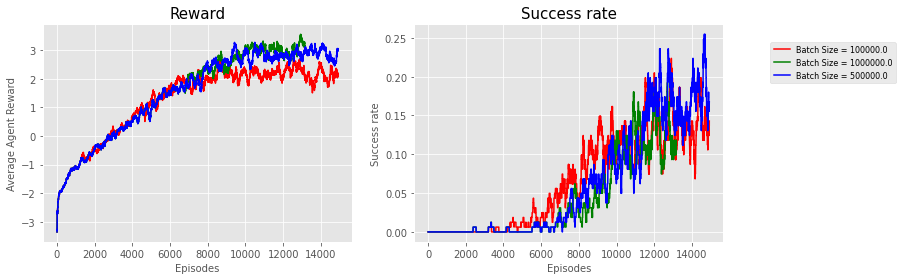

In [39]:
field = "total_avg_agent_r"#"agent_dones"
plot_term = "bufflen"

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))

filter_terms1 = []
params1 = {"title": "Reward",
         "xlabel": "Episodes",
         "ylabel": "Average Agent Reward",
         "aliasplotterm": "Batch Size",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap":{}}

data1 = filter(all_data, filter_terms1)
h1,l1,cmap = plot2(ax1, data1, field, plot_term, params1, smooth=80)


filter_terms2 = []
params2 = {"title": "Success rate",
         "xlabel": "Episodes",
         "ylabel": "Success rate",
         "aliasplotterm": "Batch Size",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap": cmap}

field = "agent_dones"
data2 = filter(all_data, filter_terms2)
h,l,cmap = plot2(ax2, data2, field, plot_term, params2, smooth=80)

fig.legend(h1,     # The line objects
           labels=l1,   # The labels for each line
           loc= (0.85,0.7)#"center right"   # Position of legend
          # borderaxespad=0.1,    # Small spacing around legend box
         #  title="Legend Title"  # Title for the legend
           )
#ax.set_xlabel('x label')  # Add an x-label to the axes.
#ax.set_ylabel('y label')  # Add a y-label to the axes.
#ax.set_title("Simple Plot")  # Add a title to the axes.
#ax.legend()  # Add a legend.

plt.subplots_adjust(right=0.8)

plt.show()

Buffer size does not have a very influence. RAM eventually runs out on e6 buff size. Therefore using half the buff size of 5e5 is sufficient.

# IC3 

# 1A1 Entropy

Env size: 7x7 with obstacle density 0.2

"seed": [1],
"batch_sizes": [500],
"entropy_coeff":[0.01,0.001],
"discount":[0.9],
"value_ceoff": [0.01],
"policy": ["IC3"],
"n_agents": [4],
"obj_density": [0.2],
"env_size": [7],
"recurrent": [False],
"base_policy_type": ["mlp"],
"comm_passes": [1],
"comm_mask_zero":[False],
"hid_size":[120],
"share_weights":[False]

In [18]:
source = '/home/james/Desktop/Gridworld/CENTRAL_TENSORBOARD/Ic3_1A'
all_data = get_event_data(source)

In [7]:
print(all_data.keys())

dict_keys(['IC3_disc_0.9_entropy_0.001_minibatch_500_commpasses_1_commzero_False_recurrent_False_envsize_7_nagents_4_objdensity_0.2_seed_1', 'IC3_disc_0.9_entropy_0.0_minibatch_500_commpasses_1_commzero_False_recurrent_False_envsize_7_nagents_4_objdensity_0.2_seed_1', 'IC3_disc_0.9_entropy_0.01_minibatch_500_commpasses_1_commzero_False_recurrent_False_envsize_7_nagents_4_objdensity_0.2_seed_1', 'IC3_disc_0.9_entropy_0.1_minibatch_500_commpasses_1_commzero_False_recurrent_False_envsize_7_nagents_4_objdensity_0.2_seed_1'])


/home/james/anaconda3/envs/gridworld/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


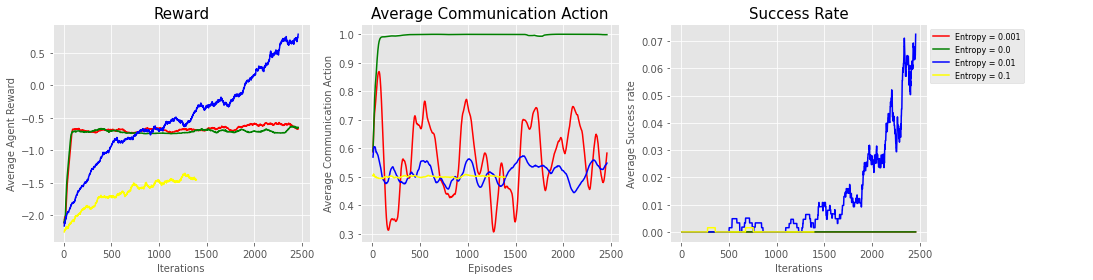

In [19]:
field = "total_avg_agent_r"#"agent_dones"
plot_term = "entropy"

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,4))

filter_terms1 = []
params1 = {"title": "Reward",
         "xlabel": "Iterations",
         "ylabel": "Average Agent Reward",
         "aliasplotterm": "Entropy",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap":{}}

data1 = filter(all_data, filter_terms1)
h1,l1,cmap = plot2(ax1, data1, field, plot_term, params1, smooth=40)

field = "avg_comm_action"#"agent_dones"
filter_terms2 = []
params2 = {"title": "Average Communication Action",
         "xlabel": "Episodes",
         "ylabel": "Average Communication Action",
         "aliasplotterm": "Entropy",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap": cmap}
data2 = filter(all_data, filter_terms2)
h,l,cmap = plot2(ax2, data2, field, plot_term, params2, smooth=40)

field = "agent_dones"
filter_terms3 = []
params3 = {"title": "Success Rate",
         "xlabel": "Iterations",
         "ylabel": "Average Success rate",
         "aliasplotterm": "Entropy",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap": cmap}

data3 = filter(all_data, filter_terms3)
h,l,cmap = plot2(ax3, data3, field, plot_term, params3, smooth=40)

fig.legend(h1,     # The line objects
           labels=l1,   # The labels for each line
           loc= (0.85,0.7)#"center right"   # Position of legend
          # borderaxespad=0.1,    # Small spacing around legend box
         #  title="Legend Title"  # Title for the legend
           )
#ax.set_xlabel('x label')  # Add an x-label to the axes.
#ax.set_ylabel('y label')  # Add a y-label to the axes.
#ax.set_title("Simple Plot")  # Add a title to the axes.
#ax.legend()  # Add a legend.

plt.subplots_adjust(right=0.8)

plt.show()

Besides performing poorly in general, the resuls also show that when entropy is introdues this largely determines the fraction of times agents decide to communicate. Since this fraction is around 50% it indicates that agents are not relying on communication as a means of coordinating and preventing collisions. This confirmed by further experimentation.

#Since communication is learned along with an agent's 

In [20]:
save_as = "plots/1/ic3_1A1.png" 
fig.savefig(make_exist(save_as))

# B Discount

In [10]:
source = '/home/james/Desktop/Gridworld/CENTRAL_TENSORBOARD/Ic3_1B'
all_data = get_event_data(source)

/home/james/anaconda3/envs/gridworld/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


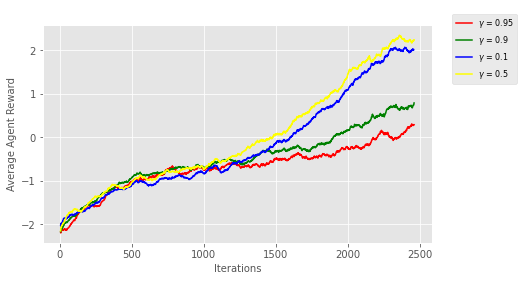

In [12]:
field = "total_avg_agent_r"#"agent_dones"
plot_term = "disc"

fig, ax1 = plt.subplots(1,1,figsize=(8,4))

filter_terms1 = []
params1 = {"title": "",
         "xlabel": "Iterations",
         "ylabel": "Average Agent Reward",
         "aliasplotterm": "$\gamma$",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap":{}}

data1 = filter(all_data, filter_terms1)
h1,l1,cmap = plot2(ax1, data1, field, plot_term, params1, smooth=40)

fig.legend(h1,     # The line objects
           labels=l1,   # The labels for each line
           loc= (0.85,0.7)#"center right"   # Position of legend
          # borderaxespad=0.1,    # Small spacing around legend box
         #  title="Legend Title"  # Title for the legend
           )
#ax.set_xlabel('x label')  # Add an x-label to the axes.
#ax.set_ylabel('y label')  # Add a y-label to the axes.
#ax.set_title("Simple Plot")  # Add a title to the axes.
#ax.legend()  # Add a legend.

plt.subplots_adjust(right=0.8)

plt.show()

Performace with discount rate follows same trend as that of PPO

#  Further experimentation with IC3Net

#  1C
Default Ic3Net parameters: Discount = 0.9 ; Entropy =0.01; Batch size= 512


Experiment performed on 7x7 Env Obstacle density=0.2, Number of agents=4

Three different policies tested:
1) IC3Net where the gating mechanism allowing for agents to choose when to communicate is learned. 
2) CommNet where the gating mechanism action choice is set to one, thereby making it equivalent to CommNet.
3) IC3Net with hidden state communication being zeroed out. In this case where there is only one communication step, this corresponds to normal PG where a large part of the inputs for the first two layers are zero. Therefore making it equivalent to normal PG for this setup

In [21]:
def plot4(ax, data,field, plts, params, smooth = None):
    ''' Plots the key-label pairs in plt where the key is a data item (single plot)'''
    colours = ['red', 'green', 'blue', 'yellow','cyan', 'magenta',\
                'black', 'orange', 'maroon', 'lime', 'aqua', \
                'indigo', 'darkviolet', 'dimgray', 'deeppink']
   # all_plots = []
    
    this_cmap = {}
    c_cpy = colours[:]
    c_taken = params["cmap"].values()
    for c in c_taken:
        if c in c_cpy:
            c_cpy.remove(c)
    
    for plt_key, plt_label in plts.items():
        assert plt_key in data
        #Data:
        d = data[plt_key]
        if not smooth is None:
            smooth_data = moving_average_filter(d[field], smooth)
            exclude_last_points = smooth + 1
        else:
            smooth_data = d[field]
            exclude_last_points = 1
        x = np.arange(len(smooth_data))
        #Colours:
        if plt_label in params["cmap"]:
            c_hldr = params["cmap"][plt_label]
        else:
            c_hldr = c_cpy[0]
            del c_cpy[0]
        this_cmap[plt_label] = c_hldr
        #Plot:
        handle = ax.plot(x[7:-exclude_last_points], smooth_data[7:-exclude_last_points], label = plt_label, color = c_hldr)[0]
      #  all_plots.append((handle,label, float(plot_term_value)))
        
        
    handles, labels = ax.get_legend_handles_labels()
    
    ax.set_xlabel(params["xlabel"], fontsize = params["xlabelsize"])  # Add an x-label to the axes.
    ax.set_ylabel(params["ylabel"], fontsize = params["ylabelsize"])  # Add a y-label to the axes.
    ax.set_title(params["title"], fontsize = params["titlesize"])  # Add a title to the axes.
    
    return handles, labels, this_cmap
 

In [22]:
source = '/home/james/Desktop/Gridworld/CENTRAL_TENSORBOARD/Ic3_1C'
all_data = get_event_data(source)

In [11]:
print(all_data.keys())

dict_keys(['IC3_disc_0.9_entropy_0.01_minibatch_500_commpasses_1_commzero_True_recurrent_False_envsize_7_nagents_4_objdensity_0.2_seed_1', 'IC3_disc_0.9_entropy_0.01_minibatch_500_commpasses_1_commzero_False_commNet_True_recurrent_False_envsize_7_nagents_4_objdensity_0.2_seed_1', 'IC3_disc_0.9_entropy_0.01_minibatch_500_commpasses_1_commzero_False_recurrent_False_envsize_7_nagents_4_objdensity_0.2_seed_1'])


In [24]:
plts = {}
labels = ["No Communication", "CommNet", "IC3Net"]
for k,l in zip(all_data.keys(), labels):
    plts[k] = l
print(plts)

{'IC3_disc_0.9_entropy_0.01_minibatch_500_commpasses_1_commzero_True_recurrent_False_envsize_7_nagents_4_objdensity_0.2_seed_1': 'No Communication', 'IC3_disc_0.9_entropy_0.01_minibatch_500_commpasses_1_commzero_False_commNet_True_recurrent_False_envsize_7_nagents_4_objdensity_0.2_seed_1': 'CommNet', 'IC3_disc_0.9_entropy_0.01_minibatch_500_commpasses_1_commzero_False_recurrent_False_envsize_7_nagents_4_objdensity_0.2_seed_1': 'IC3Net'}


/home/james/anaconda3/envs/gridworld/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


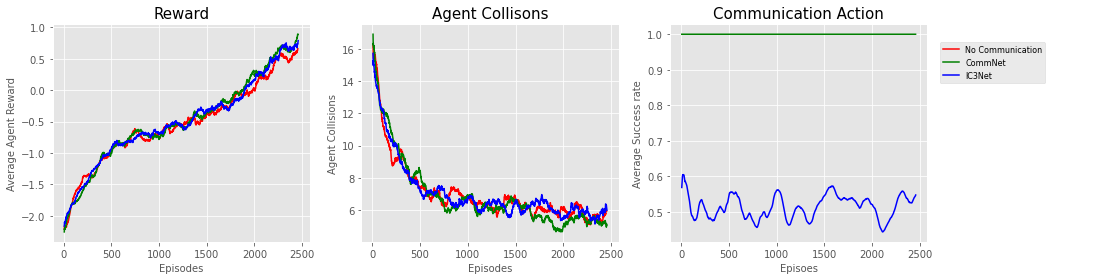

In [25]:
#plot4(ax, data,field, plts, params, smooth = None):
field = "total_avg_agent_r"  #"agent_dones"
#plot_term = ""


fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,4))

filter_terms1 = []
params1 = {"title": "Reward",
         "xlabel": "Episodes",
         "ylabel": "Average Agent Reward",
        # "aliasplotterm": "Entropy",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap":{}}

data1 = filter(all_data, filter_terms1)
h1,l1,cmap = plot4(ax1, data1, field, plts, params1, smooth=40)

field = "total_agent_collisions"#"agent_dones"
filter_terms2 = []
params2 = {"title": "Agent Collisons",
         "xlabel": "Episodes",
         "ylabel": "Agent Collisions",
       #  "aliasplotterm": "Entropy",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap": cmap}
data2 = filter(all_data, filter_terms2)
h,l,cmap = plot4(ax2, data2, field, plts, params2, smooth=40)

field = "avg_comm_action"
filter_terms3 = []
params3 = {"title": "Communication Action",
         "xlabel": "Episoes",
         "ylabel": "Average Success rate",
       #  "aliasplotterm": "Entropy",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap": cmap}

data3 = filter(all_data, filter_terms3)
del plts['IC3_disc_0.9_entropy_0.01_minibatch_500_commpasses_1_commzero_True_recurrent_False_envsize_7_nagents_4_objdensity_0.2_seed_1']
h,l,cmap = plot4(ax3, data3, field, plts, params3, smooth=40)

fig.legend(h1,     # The line objects
           labels=l1,   # The labels for each line
           loc= (0.85,0.7)#"center right"   # Position of legend
          # borderaxespad=0.1,    # Small spacing around legend box
         #  title="Legend Title"  # Title for the legend
           )

plt.subplots_adjust(right=0.8)

plt.show()

The results show that agents do not learn how communicate in order to avoid collions. Even using a seperate smaller entropy regulaization coefficient, the communication action also converges to the 50% mark, with no difference in performace. Changing the difficuity of the env by adding obstacles where action coordination would be more beneficial also did not change outcomes between policies. 

Note: Expeiment ic3_1D is that of ic3_1C with more obstacles.

In [26]:
save_as = "plots/1/ic3_1C1.png" 
fig.savefig(make_exist(save_as))

# E: CommNet and No Communication on partially observable independent navigation

Env is similar to normal MAPF environment except that agents can not see each other.

In [24]:
source = '/home/james/Desktop/Gridworld/CENTRAL_TENSORBOARD/Ic3_1E'
all_data = get_event_data(source)

N1
N1


In [25]:
acs

print(plts)

{'IC3_disc_0.9_entropy_0.01_minibatch_500_commpasses_1_commzero_False_commNet_True_recurrent_False_envsize_5_nagents_4_objdensity_0.2_seed_1': 'CommNet', 'IC3_disc_0.9_entropy_0.01_minibatch_500_commpasses_1_commzero_True_commNet_False_recurrent_False_envsize_5_nagents_4_objdensity_0.2_seed_1': 'No Communication'}


/home/james/anaconda3/envs/gridworld/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


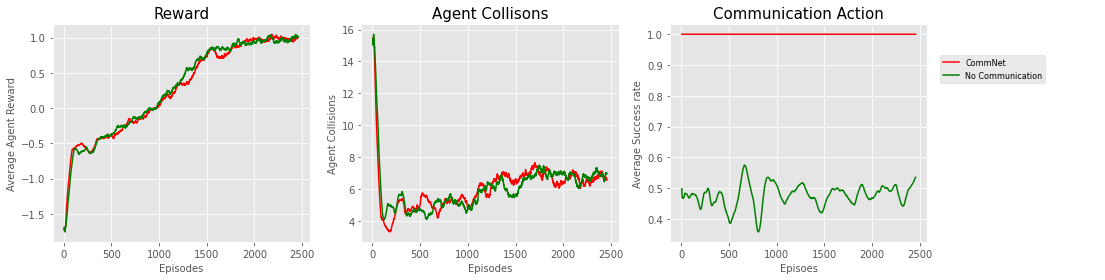

In [26]:
#plot4(ax, data,field, plts, params, smooth = None):
field = "total_avg_agent_r"  #"agent_dones"
#plot_term = ""


fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,4))

filter_terms1 = []
params1 = {"title": "Reward",
         "xlabel": "Episodes",
         "ylabel": "Average Agent Reward",
        # "aliasplotterm": "Entropy",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap":{}}

data1 = filter(all_data, filter_terms1)
h1,l1,cmap = plot4(ax1, data1, field, plts, params1, smooth=40)

field = "total_agent_collisions"#"agent_dones"
filter_terms2 = []
params2 = {"title": "Agent Collisons",
         "xlabel": "Episodes",
         "ylabel": "Agent Collisions",
       #  "aliasplotterm": "Entropy",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap": cmap}
data2 = filter(all_data, filter_terms2)
h,l,cmap = plot4(ax2, data2, field, plts, params2, smooth=40)

field = "avg_comm_action"
filter_terms3 = []
params3 = {"title": "Communication Action",
         "xlabel": "Episoes",
         "ylabel": "Average Success rate",
       #  "aliasplotterm": "Entropy",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap": cmap}

data3 = filter(all_data, filter_terms3)
h,l,cmap = plot4(ax3, data3, field, plts, params3, smooth=40)

fig.legend(h1,     # The line objects
           labels=l1,   # The labels for each line
           loc= (0.85,0.7)#"center right"   # Position of legend
          # borderaxespad=0.1,    # Small spacing around legend box
         #  title="Legend Title"  # Title for the legend
           )

plt.subplots_adjust(right=0.8)

plt.show()

NB: Not neccessary to use these plots...just state results
NB: PPO plot data also available which reaches same level of performance (slightly outperforms) as both IC3 policies.

With partially observable independent navigation task, still no difference in performance...agents still learn not to rely on communication to avoid collisions. Collisions are merely noise in the environmnet.

# F: CommNet vs No comm on CN-partially observable

In [27]:
source = '/home/james/Desktop/Gridworld/CENTRAL_TENSORBOARD/Ic3_1F'
all_data = get_event_data(source)

In [28]:
plts = {}
labels = ["No Communication", "CommNet", "No Communication Fully Observable"]
plts['IC3_disc_0.9_entropy_0.01_minibatch_500_commpasses_1_commzero_True_commNet_False_recurrent_False_envsize_5_nagents_4_objdensity_0.2_seed_1'] = labels[0]
plts['IC3_disc_0.9_entropy_0.01_minibatch_500_commpasses_1_commzero_False_commNet_True_recurrent_False_envsize_5_nagents_4_objdensity_0.2_seed_1'] = labels[1]
#plts['PPO_CN1_disc_0.5_lambda_1.0_entropy_0.01_minibatch_512_rollouts_256_workers_4_kepochs_8_envsize_5_nagents_4_objdensity_0.2_lr_0.001_seed_1'] = labels[2]
#plts['PPO_CN0_disc_0.5_lambda_1.0_entropy_0.01_minibatch_512_rollouts_256_workers_4_kepochs_8_envsize_5_nagents_4_objdensity_0.2_lr_0.001_seed_1'] = labels[3]
plts['IC3_CN0_disc_0.9_entropy_0.01_minibatch_500_commpasses_1_commzero_True_commNet_False_recurrent_False_envsize_5_nagents_4_objdensity_0.2_seed_1'] =labels[2]
print(plts)

{'IC3_disc_0.9_entropy_0.01_minibatch_500_commpasses_1_commzero_True_commNet_False_recurrent_False_envsize_5_nagents_4_objdensity_0.2_seed_1': 'No Communication', 'IC3_disc_0.9_entropy_0.01_minibatch_500_commpasses_1_commzero_False_commNet_True_recurrent_False_envsize_5_nagents_4_objdensity_0.2_seed_1': 'CommNet', 'IC3_CN0_disc_0.9_entropy_0.01_minibatch_500_commpasses_1_commzero_True_commNet_False_recurrent_False_envsize_5_nagents_4_objdensity_0.2_seed_1': 'No Communication Fully Observable'}


/home/james/anaconda3/envs/gridworld/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


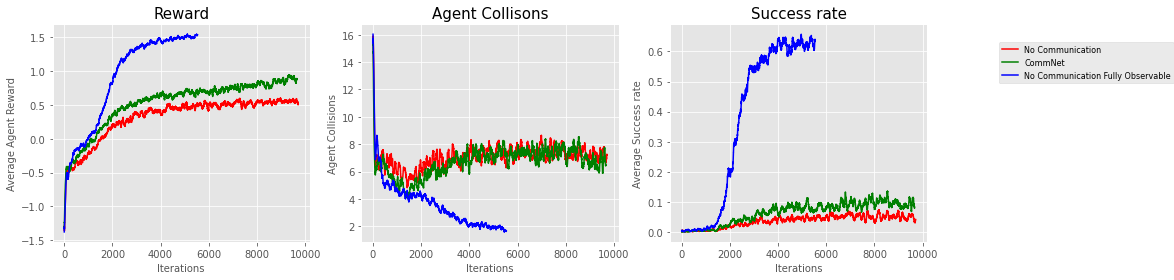

In [29]:
#plot4(ax, data,field, plts, params, smooth = None):
field = "total_avg_agent_r"  #"agent_dones"
#plot_term = ""


fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,4))

filter_terms1 = []
params1 = {"title": "Reward",
         "xlabel": "Iterations",
         "ylabel": "Average Agent Reward",
        # "aliasplotterm": "Entropy",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap":{}}

data1 = filter(all_data, filter_terms1)
h1,l1,cmap = plot4(ax1, data1, field, plts, params1, smooth=40)

field = "total_agent_collisions"#"agent_dones"
filter_terms2 = []
params2 = {"title": "Agent Collisons",
         "xlabel": "Iterations",
         "ylabel": "Agent Collisions",
       #  "aliasplotterm": "Entropy",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap": cmap}
data2 = filter(all_data, filter_terms2)
h,l,cmap = plot4(ax2, data2, field, plts, params2, smooth=40)

field = "agent_dones"
filter_terms3 = []
params3 = {"title": "Success rate",
         "xlabel": "Iterations",
         "ylabel": "Average Success rate",
       #  "aliasplotterm": "Entropy",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap": cmap}

data3 = filter(all_data, filter_terms3)
h,l,cmap = plot4(ax3, data3, field, plts, params3, smooth=40)

fig.legend(h1,     # The line objects
           labels=l1,   # The labels for each line
           loc= (0.85,0.7)#"center right"   # Position of legend
          # borderaxespad=0.1,    # Small spacing around legend box
         #  title="Legend Title"  # Title for the legend
           )

plt.subplots_adjust(right=0.8)

plt.show()

In cooperative navigation, communication does give consistently improved performance, but only slightly. A possible reason for this difference compared to independent navigation could be that in CN all landmarks are shared between agents, whilst in independent navigation each agent has their own goal. This means that in CN the situation can arise where other agents occupy certain landmarks and do not move away since goals are shared. In the situation where each agent has their own goal, agent have no reason to occupy other agent's goals and will likely move away towards their own goal. No communication Fully observable shows how well a policy can perform if other agent positions are available. If an effective communication protocall is found, this 

In [30]:
save_as = "plots/1/ic3_1F1.png" 
fig.savefig(make_exist(save_as))

# NB Repeat experiment G

# G: No obstacles Cooperative Navigation

In [31]:
source = '/home/james/Desktop/Gridworld/CENTRAL_TENSORBOARD/Ic3_1G'
all_data = get_event_data(source, remove_duplicates = False)

In [48]:
all_data.keys()

dict_keys(['IC3_disc_0.9_entropy_0.01_minibatch_500_commpasses_1_commzero_False_commNet_True_recurrent_False_envsize_5_nagents_4_objdensity_0.0_seed_1_N1', 'IC3_disc_0.9_entropy_0.01_minibatch_500_commpasses_1_commzero_False_commNet_True_recurrent_False_envsize_5_nagents_4_objdensity_0.0_seed_1', 'IC3_disc_0.9_entropy_0.01_minibatch_500_commpasses_1_commzero_False_commNet_False_recurrent_False_envsize_5_nagents_4_objdensity_0.0_seed_1', 'PPO_CN1_disc_0.5_lambda_1.0_entropy_0.01_minibatch_512_rollouts_256_workers_4_kepochs_8_envsize_5_nagents_4_objdensity_0.0_lr_0.001_seed_1', 'IC3_disc_0.9_entropy_0.01_minibatch_500_commpasses_1_commzero_True_commNet_False_recurrent_False_envsize_5_nagents_4_objdensity_0.0_seed_1', 'PPO_CN0_disc_0.5_lambda_1.0_entropy_0.01_minibatch_512_rollouts_256_workers_4_kepochs_8_envsize_5_nagents_4_objdensity_0.0_lr_0.001_seed_1'])

In [32]:
plts = {}
labels = ["No Communication", "CommNet", "IC3Net"]
plts['IC3_disc_0.9_entropy_0.01_minibatch_500_commpasses_1_commzero_True_commNet_False_recurrent_False_envsize_5_nagents_4_objdensity_0.0_seed_1'] = labels[0]
plts['IC3_disc_0.9_entropy_0.01_minibatch_500_commpasses_1_commzero_False_commNet_True_recurrent_False_envsize_5_nagents_4_objdensity_0.0_seed_1_N1'] = labels[1]
plts['IC3_disc_0.9_entropy_0.01_minibatch_500_commpasses_1_commzero_False_commNet_False_recurrent_False_envsize_5_nagents_4_objdensity_0.0_seed_1'] = labels[2]

/home/james/anaconda3/envs/gridworld/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


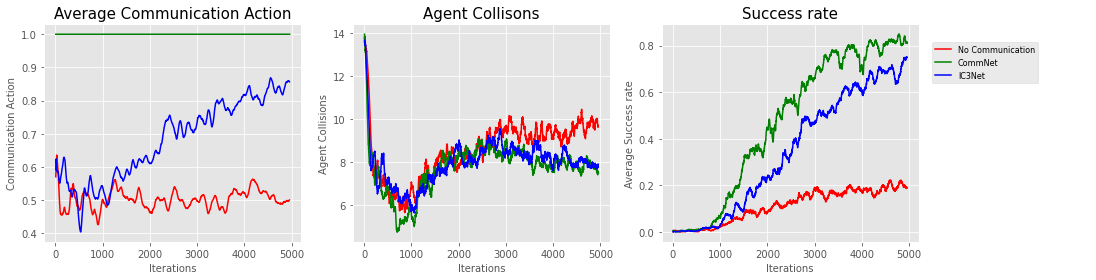

In [33]:
#plot4(ax, data,field, plts, params, smooth = None):
field = "avg_comm_action"  #"agent_dones"
#plot_term = ""


fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,4))

filter_terms1 = []
params1 = {"title": "Average Communication Action",
         "xlabel": "Iterations",
         "ylabel": "Communication Action",
        # "aliasplotterm": "Entropy",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap":{}}

data1 = filter(all_data, filter_terms1)
h1,l1,cmap = plot4(ax1, data1, field, plts, params1, smooth=40)

field = "total_agent_collisions"#"agent_dones"
filter_terms2 = []
params2 = {"title": "Agent Collisons",
         "xlabel": "Iterations",
         "ylabel": "Agent Collisions",
       #  "aliasplotterm": "Entropy",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap": cmap}
data2 = filter(all_data, filter_terms2)
h,l,cmap = plot4(ax2, data2, field, plts, params2, smooth=40)

field = "agent_dones"
filter_terms3 = []
params3 = {"title": "Success rate",
         "xlabel": "Iterations",
         "ylabel": "Average Success rate",
       #  "aliasplotterm": "Entropy",
         "titlesize":15,
         "xlabelsize":10,
         "ylabelsize":10,
          "cmap": cmap}

data3 = filter(all_data, filter_terms3)
h,l,cmap = plot4(ax3, data3, field, plts, params3, smooth=40)

fig.legend(h1,     # The line objects
           labels=l1,   # The labels for each line
           loc= (0.85,0.7)#"center right"   # Position of legend
          # borderaxespad=0.1,    # Small spacing around legend box
         #  title="Legend Title"  # Title for the legend
           )

plt.subplots_adjust(right=0.8)

plt.show()

In [34]:
save_as = "plots/1/ic3_1G1.png" 
fig.savefig(make_exist(save_as))

# Notes on communication

- Other types of communication such as sharing of observations or positions can also be investigated. (and different types etc..)

- A hand crafted communication protocol where agents in a certain range for example shares their intended action choices or sequence of actions)

# ____

# Other notes:

- Mention reward scaling used in MAAC
- Mention no reward scaling was more beneficial in PPO

# NB Note on Logging:


## As of everything before reward structure experiments 'agent_dones' represent the task success rate where all agents are only done when every agent is on their respective goal. From reward structure experiments onwards (from 26/7/2020) 'agent_dones' represent the avarage number of agents who are on their goal positions when the episode terminates and "'all_agents_on_goal" represents average number of times in which all agents arrived to their goal (previously 'agent_dones").


Exception: asfd

In [6]:
a = {0:False, 1:False, 2:True}
b = sum(a.values())
print(b)

1
